#### Product sentiment classification

The problem deals with an e-commerce products review and its sentiment here the goal is to predict the sentiment of these reviews based on available historical data.

#### Evaluation Metric:
The metric used for evaluating the performance of classification model would be F1-Score.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [170]:
import pandas as pd
import numpy as np
# To filter warnings
import warnings 
warnings.filterwarnings("ignore")

<b> Loading data  </b>

In [112]:
data = pd.read_csv("product_sentiment_classification.csv")

<b> Understanding data </b>

In [113]:
data.head()

,Unnamed: 0,Product_Description,Sentiment
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive
1,1,RT @mention Line for iPad 2 is longer today th...,Positive
2,2,Crazy that Apple is opening a temporary store ...,Positive
3,3,The lesson from Google One Pass: In this digit...,Positive
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive


In [114]:
data.columns = ['id', 'Product_Description', 'Sentiment']

In [115]:
pd.set_option("display.max_rows",None)

In [116]:
data.head()

,id,Product_Description,Sentiment
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive
1,1,RT @mention Line for iPad 2 is longer today th...,Positive
2,2,Crazy that Apple is opening a temporary store ...,Positive
3,3,The lesson from Google One Pass: In this digit...,Positive
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive


In [117]:
data.shape

(4164, 3)

In [118]:
data["Sentiment"].value_counts()

Positive    3765
Negetive     399
Name: Sentiment, dtype: int64

In [119]:
data["Sentiment"].value_counts(normalize=True)*100

Positive    90.417867
Negetive     9.582133
Name: Sentiment, dtype: float64

In [120]:
#The dataset has imbalance

In [121]:
data.isnull().sum()

id                     0
Product_Description    0
Sentiment              0
dtype: int64

#### Data cleaning

The data has @mentions and #tag mentions, preprocessing step involves removing these tags

In [122]:
import re
def remove_handles(text,pattern):
    handles=re.findall(pattern,text)
    for handle in handles:
        text=re.sub(handle,'',text)
    return text

# Remove handles like @
data['clean_des'] = data.Product_Description.apply(lambda Product_Description: remove_handles(str(Product_Description),"@[\w]*"))

In [123]:
data.head(20)

,id,Product_Description,Sentiment,clean_des
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,The Web DesignerÛªs Guide to iOS (and Android...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,RT Line for iPad 2 is longer today than yeste...
2,2,Crazy that Apple is opening a temporary store ...,Positive,Crazy that Apple is opening a temporary store ...
3,3,The lesson from Google One Pass: In this digit...,Positive,The lesson from Google One Pass: In this digit...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,"RT At the panel: &quot;Your mom has an ipad, ..."
5,5,RT @mention I think my effing hubby is in line...,Negetive,RT I think my effing hubby is in line for an ...
6,6,&quot;Android users are not iPhone users. (The...,Positive,&quot;Android users are not iPhone users. (The...
7,7,Google to Launch New Social Network Called Cir...,Positive,Google to Launch New Social Network Called Cir...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,Welcome! Enjoy #Sxsw and ride anywhere in Au...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,"RT Apple plans to Keep Austin Wired, opening ..."


In [124]:
def remove_specialchars(text,pattern):
    text=re.sub(pattern,' ',text)
    return text

# Remove special characters,numbers and punctuations except " # " and " ' "
data['clean_des'] = data.clean_des.apply(lambda clean_des: remove_specialchars(str(clean_des),"[^a-zA-Z'#]"))

In [125]:
data.head(20)

,id,Product_Description,Sentiment,clean_des
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,The Web Designer s Guide to iOS and Android...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,RT Line for iPad is longer today than yeste...
2,2,Crazy that Apple is opening a temporary store ...,Positive,Crazy that Apple is opening a temporary store ...
3,3,The lesson from Google One Pass: In this digit...,Positive,The lesson from Google One Pass In this digit...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,RT At the panel quot Your mom has an ipad ...
5,5,RT @mention I think my effing hubby is in line...,Negetive,RT I think my effing hubby is in line for an ...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot Android users are not iPhone users The...
7,7,Google to Launch New Social Network Called Cir...,Positive,Google to Launch New Social Network Called Cir...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,Welcome Enjoy #Sxsw and ride anywhere in Au...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,RT Apple plans to Keep Austin Wired opening ...


#### Data preprocessing

!python -m spacy download en_core_web_sm

!pip install -U spacy

In [126]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

In [127]:
# Step - a: Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
data['clean_des'] = [sentence.lower() for sentence in data['clean_des']]

# Step - b: Tokenization and Remove Stop words, Non-alphabetic and perfom Word Lemmatization.
stop_words = list(STOP_WORDS)
for index, entry in enumerate(data['clean_des']):
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    clean_text = " ".join(tokens)
    data.loc[index, 'clean_text'] = clean_text

In [128]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer s guide io android app today m li...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,rt line ipad long today yesterday sxsw get lin...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,rt panel quot mom ipad design boomer quot sxsw
5,5,RT @mention I think my effing hubby is in line...,Negetive,rt i think my effing hubby is in line for an ...,rt think eff hubby line ipad point line wife n...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,Positive,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy sxsw ride austin dwnld groundlin...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,rt apple plans to keep austin wired opening ...,rt apple plan austin wire open pop apple store...


In [129]:
# remove short words (length < 2)
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [130]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer guide android app today link sxsw
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,line ipad long today yesterday sxsw get line t...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot sxsw
5,5,RT @mention I think my effing hubby is in line...,Negetive,rt i think my effing hubby is in line for an ...,think eff hubby line ipad point line wife numb...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,Positive,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy sxsw ride austin dwnld groundlin...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,rt apple plans to keep austin wired opening ...,apple plan austin wire open pop apple store sx...


In [131]:
data.dtypes

id                      int64
Product_Description    object
Sentiment              object
clean_des              object
clean_text             object
dtype: object

In [132]:
data["clean_text"] = data["clean_text"].astype("category")

In [133]:
data.dtypes

id                        int64
Product_Description      object
Sentiment                object
clean_des                object
clean_text             category
dtype: object

In [ ]:
#"sxsw" repeating more times remove the word and prefix with sxsw

In [134]:
import re
def remove_handles(text,pattern):
    handles=re.findall(pattern,text)
    for handle in handles:
        text=re.sub(handle,'',text)
    return text

# Remove handles like @
data['clean_text'] = data.clean_text.apply(lambda Product_Description: remove_handles(str(Product_Description),"sxsw[\w]*"))

In [135]:
data.head(10)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer guide android app today link
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,line ipad long today yesterday get line today...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot
5,5,RT @mention I think my effing hubby is in line...,Negetive,rt i think my effing hubby is in line for an ...,think eff hubby line ipad point line wife numb...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,Positive,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy ride austin dwnld groundlink ap...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,rt apple plans to keep austin wired opening ...,apple plan austin wire open pop apple store link


#### Visualizing most frequent words using WordCloud

In [71]:
#!pip install wordcloud

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [137]:
Positive_review = data[data["Sentiment"] == "Positive"]["clean_text"]
Negetive_review = data[data["Sentiment"] == "Negetive"]["clean_text"]

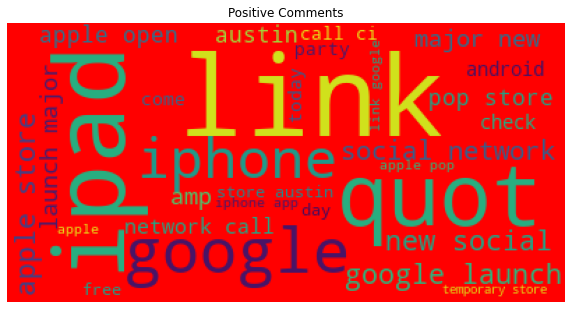

In [138]:
wordcloud = WordCloud(max_font_size=80, max_words=30, background_color="red").generate(str(Positive_review))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Comments")
plt.show()

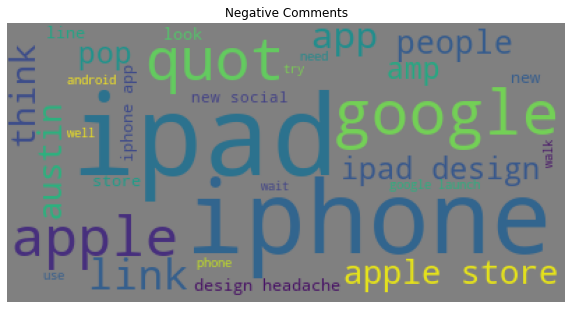

In [139]:
wordcloud = WordCloud(max_font_size=80, max_words=30, background_color="gray").generate(str(Negetive_review))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative Comments")
plt.show()

#### label encoding the target variable

In [140]:
data.head()

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer guide android app today link
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,line ipad long today yesterday get line today...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot


In [141]:
#label encoding the target variable
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
le.fit(data["Sentiment"])
data["Sentiment"] = le.transform(data["Sentiment"])

In [142]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,1,the web designer s guide to ios and android...,web designer guide android app today link
1,1,RT @mention Line for iPad 2 is longer today th...,1,rt line for ipad is longer today than yeste...,line ipad long today yesterday get line today...
2,2,Crazy that Apple is opening a temporary store ...,1,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,1,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,1,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot
5,5,RT @mention I think my effing hubby is in line...,0,rt i think my effing hubby is in line for an ...,think eff hubby line ipad point line wife numb...
6,6,&quot;Android users are not iPhone users. (The...,1,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,1,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,1,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy ride austin dwnld groundlink ap...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",1,rt apple plans to keep austin wired opening ...,apple plan austin wire open pop apple store link


In [143]:
#Sentiment "1" means "Positive"
#Sentiment "0" means "Negative"

#### Perform the train test split on the data and then build the model

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
train_X, test_X, train_y, test_y = train_test_split(data['clean_text'], data['Sentiment'], 
                                                    stratify = data['Sentiment'],
                                                    test_size=0.3, random_state=123)

In [146]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2914,)
(1250,)
(2914,)
(1250,)


In [147]:
train_X.head(5)

1817    umbrella quot list quot set link edchat musedc...
1874                         yeah sure check link  google
3914                       map favorite place austin link
4125    crap need bring amex apple open pop shop  repo...
1257            come check ipad app demos arm  mon link  
Name: clean_text, dtype: object

In [148]:
train_y.value_counts(normalize=True)*100

1    90.425532
0     9.574468
Name: Sentiment, dtype: float64

In [149]:
test_y.value_counts(normalize=True)*100

1    90.4
0     9.6
Name: Sentiment, dtype: float64

### Calculate TF-IDF
####  Term Frequency: This summarizes how often a given word appears within a document
#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split


In [171]:
#removing stop words 
stop_words = list(stop_words) + ['aa','aah','da','lar','ok']

Tfidf_vect = TfidfVectorizer(stop_words=stop_words, max_df=0.8)

Tfidf_vect.fit(train_X)

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [172]:
print(train_X_Tfidf.shape)

(2914, 3978)


In [173]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
dense_mat = train_X_Tfidf.todense()
tfidf_Mat = pd.DataFrame(dense_mat, columns=Tfidf_vect.get_feature_names())
tfidf_Mat.head()

,aapl,aaron,abacus,abandon,abc,ability,able,absolutley,abt,academy,...,zeitgeist,zelda,zeldman,zinio,zip,zlf,zomb,zombie,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
print([col for col in tfidf_Mat.columns])

['aapl', 'aaron', 'abacus', 'abandon', 'abc', 'ability', 'able', 'absolutley', 'abt', 'academy', 'acc', 'accel', 'acceleration', 'accelerator', 'accept', 'access', 'accessibility', 'accessible', 'accessory', 'accompany', 'accomplish', 'accord', 'account', 'accuracy', 'achievement', 'ackward', 'aclu', 'acoustic', 'acquire', 'acquisition', 'act', 'action', 'activity', 'actsofshare', 'actsofsharing', 'actual', 'actually', 'adam', 'adapter', 'adaptive', 'add', 'addict', 'addition', 'adi', 'adloopz', 'admit', 'admob', 'adobe', 'adoption', 'advance', 'adventure', 'advertise', 'advertising', 'advice', 'advise', 'afar', 'affect', 'affiliate', 'afford', 'afraid', 'africa', 'african', 'afternoon', 'afteward', 'aftrnoon', 'agchat', 'age', 'agency', 'aggregate', 'aggregator', 'agileagency', 'agnerd', 'ago', 'agree', 'ahead', 'ahem', 'ahhh', 'ahi', 'ahold', 'ahoy', 'aid', 'aight', 'aim', 'air', 'airport', 'aisle', 'ajax', 'aka', 'akqa', 'ala', 'alamo', 'alarm', 'album', 'alcohol', 'alert', 'algorit

#### Use the ML Algorithms to Predict the label

#### Logistic Regression

In [175]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

In [199]:
##Model Building
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
lreg = LogisticRegression()
lreg.fit(train_X_Tfidf, train_y)

LogisticRegression()

In [202]:
y_pred_train = lreg.predict(train_X_Tfidf)
y_pred_test = lreg.predict(test_X_Tfidf)

In [203]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"Logistic Reg",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.0,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138


#### SVM

In [204]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')

In [205]:
SVM.fit(train_X_Tfidf, train_y)
y_pred_train = SVM.predict(train_X_Tfidf)
y_pred_test = SVM.predict(test_X_Tfidf)

In [206]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487


#### SVM with Grid search

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [208]:
##svm with best parameters
param_grid = {'C': [0.1, 0.5,1],
             'penalty': ['l1','l2']}

In [209]:
SVM_Grid = GridSearchCV(LinearSVC(),
                   param_grid,verbose=1)


In [210]:
SVM_Grid.fit(train_X_Tfidf, train_y)
y_pred_train = SVM_Grid.predict(train_X_Tfidf)
y_pred_test = SVM_Grid.predict(test_X_Tfidf)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [211]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVM_Best par",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021


#### Naive Bayes

In [212]:
naive = naive_bayes.MultinomialNB()

In [213]:
naive.fit(train_X_Tfidf, train_y)
y_pred_train = naive.predict(train_X_Tfidf)
y_pred_test = naive.predict(test_X_Tfidf)

In [214]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"Naive Bayes",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580


#### Dimensionality reduction using truncated SVD (aka LSA). 

> *This* transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). This can work with sparse matrices efficiently.

> In particular, truncated SVD works on term count or tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).
---


In [215]:
svd = TruncatedSVD(n_components=200) # Note: Use grid/random search to identify best value for n-components hyper-parameternt
svd.fit(train_X_Tfidf)

TruncatedSVD(n_components=200)

In [216]:
train_X_SVD = svd.transform(train_X_Tfidf)
test_X_SVD = svd.transform(test_X_Tfidf)

In [217]:
print(train_X_Tfidf.shape)
print(train_X_SVD.shape)

(2914, 3978)
(2914, 200)


In [218]:
##svm with best parameters
param_grid = {'C': [0.1, 0.5,1],
             'penalty': ['l1','l2']}

In [219]:
SVM_SVD = GridSearchCV(LinearSVC(),
                   param_grid,verbose=1)


In [220]:
SVM_SVD.fit(train_X_SVD, train_y)
y_pred_train = SVM_SVD.predict(train_X_SVD)
y_pred_test = SVM_SVD.predict(test_X_SVD )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [221]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_SVM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452


In [223]:
##Decion Tree with svd
SVD_DT=DecisionTreeClassifier(class_weight='balanced')

In [224]:
SVD_DT.fit(train_X_SVD, train_y)
y_pred_train = SVD_DT.predict(train_X_SVD)
y_pred_test = SVD_DT.predict(test_X_SVD )

In [225]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_DT",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028


In [226]:
##Random forest with svd
SVD_RF=RandomForestClassifier(n_jobs=-1,class_weight='balanced')

In [227]:
SVD_RF.fit(train_X_SVD, train_y)
y_pred_train = SVD_RF.predict(train_X_SVD)
y_pred_test = SVD_RF.predict(test_X_SVD )

In [228]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_RF",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028
6,SVD_RF,0.993480,0.993548,0.999237,0.996384,0.9032,0.985841,0.913864,0.948489


In [231]:
#4)Random search classifier with Grid Search
param_grid = {"n_estimators" : [50,75,100],
              "max_depth" : np.arange(1,8,1),
              "min_samples_leaf" : [1, 2,3,4,5]}
dt_RF=RandomForestClassifier(n_jobs=-1,class_weight='balanced')
RF_gs=RandomizedSearchCV(dt_RF,param_grid,n_jobs=-1,n_iter=100)

In [232]:
RF_gs.fit(train_X_SVD, train_y)
y_pred_train = RF_gs.predict(train_X_SVD)
y_pred_test = RF_gs.predict(test_X_SVD )

In [233]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_RF_GS",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028
6,SVD_RF,0.993480,0.993548,0.999237,0.996384,0.9032,0.985841,0.913864,0.948489
7,SVD_RF_GS,0.946465,0.943074,0.997591,0.969567,0.8616,0.913274,0.932249,0.922664


In [234]:
##Take 400 components in svd
svd = TruncatedSVD(n_components=400) # Note: Use grid/random search to identify best value for n-components hyper-parameternt
svd.fit(train_X_Tfidf)

TruncatedSVD(n_components=400)

In [235]:
train_X_SVD = svd.transform(train_X_Tfidf)
test_X_SVD = svd.transform(test_X_Tfidf)

In [236]:
##svm with best parameters
param_grid = {'C': [0.1, 0.5,1],
             'penalty': ['l1','l2']}

In [237]:
SVM_SVD = GridSearchCV(LinearSVC(),
                   param_grid,verbose=1)


In [238]:
SVM_SVD.fit(train_X_SVD, train_y)
y_pred_train = SVM_SVD.predict(train_X_SVD)
y_pred_test = SVM_SVD.predict(test_X_SVD )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [239]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_SVM(400)",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028
6,SVD_RF,0.993480,0.993548,0.999237,0.996384,0.9032,0.985841,0.913864,0.948489
7,SVD_RF_GS,0.946465,0.943074,0.997591,0.969567,0.8616,0.913274,0.932249,0.922664
8,SVD_SVM(400),0.923816,0.996584,0.924974,0.959445,0.9048,0.992920,0.909976,0.949640


In [240]:
##Decion Tree with svd with 400componentes
SVD_DT=DecisionTreeClassifier(class_weight='balanced')

In [241]:
SVD_DT.fit(train_X_SVD, train_y)
y_pred_train = SVD_DT.predict(train_X_SVD)
y_pred_test = SVD_DT.predict(test_X_SVD )

In [242]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_DT(400)",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028
6,SVD_RF,0.993480,0.993548,0.999237,0.996384,0.9032,0.985841,0.913864,0.948489
7,SVD_RF_GS,0.946465,0.943074,0.997591,0.969567,0.8616,0.913274,0.932249,0.922664
8,SVD_SVM(400),0.923816,0.996584,0.924974,0.959445,0.9048,0.992920,0.909976,0.949640
9,SVD_DT(400),0.993480,0.993169,0.999618,0.996383,0.8448,0.903540,0.923146,0.913238


In [243]:
##Random forest with svd
SVD_RF=RandomForestClassifier(n_jobs=-1,class_weight='balanced')

In [244]:
SVD_RF.fit(train_X_SVD, train_y)
y_pred_train = SVD_RF.predict(train_X_SVD)
y_pred_test = SVD_RF.predict(test_X_SVD )

In [245]:
scores = get_metrics(train_y,y_pred_train,test_y,y_pred_test,"SVD_RF(400)",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Reg,0.909746,1.000000,0.909248,0.952467,0.9032,0.999115,0.903923,0.949138
1,SVM,0.942690,0.998861,0.941345,0.969251,0.9064,0.993805,0.910787,0.950487
2,SVM_Best par,0.985587,0.999241,0.985036,0.992087,0.9064,0.984071,0.918249,0.950021
3,Naive Bayes,0.910089,1.000000,0.909562,0.952639,0.9040,1.000000,0.904000,0.949580
4,SVD_SVM,0.914550,0.998482,0.914812,0.954818,0.9040,0.997345,0.905949,0.949452
5,SVD_DT,0.993480,0.993169,0.999618,0.996383,0.8624,0.925664,0.922399,0.924028
6,SVD_RF,0.993480,0.993548,0.999237,0.996384,0.9032,0.985841,0.913864,0.948489
7,SVD_RF_GS,0.946465,0.943074,0.997591,0.969567,0.8616,0.913274,0.932249,0.922664
8,SVD_SVM(400),0.923816,0.996584,0.924974,0.959445,0.9048,0.992920,0.909976,0.949640
9,SVD_DT(400),0.993480,0.993169,0.999618,0.996383,0.8448,0.903540,0.923146,0.913238


In [250]:
print(scores[scores['Model'].str.contains("SVD_")]['Test_F1_Score'].mean())
print(scores[scores['Model'].str.contains("(400)")]['Test_F1_Score'].mean())

0.9367115853942952
0.9374491423576611
